# Exercise Sheet 6

Willy Oesterheld (508791)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


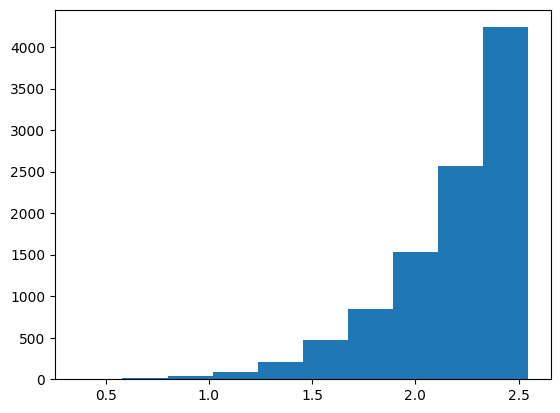

In [51]:
data = pd.read_csv('../../notebooks/data/ex6_data.txt', header=None)
x = data[0]
plt.hist(x)

def model(params, x):
    return params[0]*x**params[1]

def exll(params, x):
    y = model(params[1:], x)
    nonzero = y != 0
    return -params[0] + np.sum(np.log(params[0]*y[y!=0]))

fit = sp.optimize.minimize(exll, x0=(np.mean(x), 1, 1), args=x,  bounds=((1e-8,None), (1e-8,None), (None, None)))

y = model(fit.x[1:], x)

plt.plot(y)
